In [13]:
#importing required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

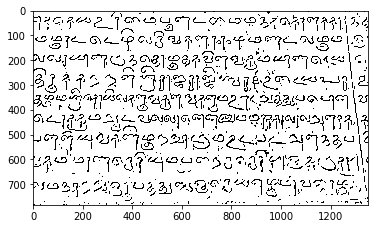

In [14]:
#reading the image
im = cv2.imread('test6.jpg',0)
cv2.imshow('Original',im)
cv2.waitKey(0)
RGB_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #opencv reads image in BGR format to display in matplot lib we convert it to RGB
plt.imshow(RGB_im)

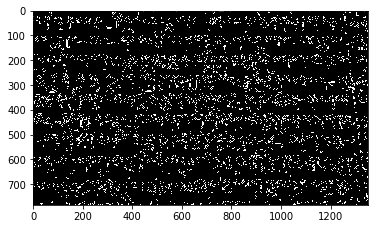

In [15]:
#Canny edge detection for detecting edges
dst=cv2.Canny(im,0,150)
cv2.imshow('edges',dst)
cv2.waitKey(0)
RGB_im = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)  #opencv reads image in BGR format to display in matplot lib we convert it to RGB
plt.imshow(RGB_im)

In [19]:
ret,thresh1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY) #Binarizing the image again using image threshholding
rect_kernal = cv2.getStructuringElement(cv2.MORPH_RECT,(100,100)) #creating structuring element (bounding boxes) rectangles of size limit 100x100
threshed = cv2.morphologyEx(thresh1,cv2.MORPH_CLOSE,rect_kernal) #Dilation followed by Erosion.

In [20]:
#finding blocks continuous black pixels using contours and making bounding box around them
contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),3)

In [21]:
#Filtering out the remaining noise and selecting only character contours from the image
i=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w<100 and w>30 and h>30 and h<100:
        cv2.imwrite(str(i)+".jpg",thresh1[y:y+h,x:x+w])
        i=i+1

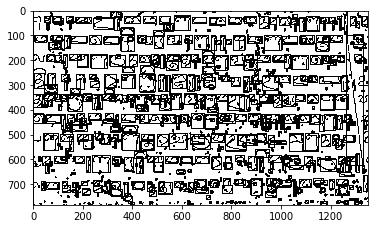

In [23]:
cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imshow('BindingBox',im)
cv2.imwrite('BindingBox.jpg',im)
cv2.waitKey(0)
RGB_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #opencv reads image in BGR format to display in matplot lib we convert it to RGB
plt.imshow(RGB_im)